In [80]:
import pandas as pd
from collections import Counter
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns 
warnings.filterwarnings('ignore')

In [81]:
data = pd.read_csv('./data_w_genres_removed2.csv')
data = data.drop('count', axis = 1)

In [82]:
data.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,['show tunes'],NaN,0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.44800,0.210389,117.518111,0.389500,NaN,5.0,1
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.69000,0.176212,103.044154,0.268865,30.576923,5.0,1
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,NaN,0.118514,77.375857,0.354857,34.857143,0.0,1
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.63937,0.123200,88.667630,0.372030,34.851852,NaN,1
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",NaN,0.467143,270436.142857,0.488286,0.009400,0.195000,NaN,0.098543,122.835857,0.482286,43.000000,NaN,1


In [83]:
data.isnull().sum(axis = 0)

genres                 0
artists             3761
acousticness        2870
danceability           0
duration_ms         3348
energy                 0
instrumentalness       0
liveness            5855
loudness            6625
speechiness            0
tempo                  0
valence                0
popularity          1488
key                 2422
mode                   0
dtype: int64

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           24919 non-null  object 
 2   acousticness      25810 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       25332 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          22825 non-null  float64
 8   loudness          22055 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        27192 non-null  float64
 13  key               26258 non-null  float64
 14  mode              28680 non-null  int64  
dtypes: float64(12), int64(1), object(2)
memory usage: 3.3+ MB


In [85]:
# Label (genres) 為 '[]' 的數量
data[data['genres'] == '[]']['genres'].count()

9857

In [86]:
print(data['genres'].unique())
print('\n* Genres (Labels) Unique Number:', len(data['genres'].unique()))

["['show tunes']" '[]' "['comedy rock', 'comic', 'parody']" ...
 "['mainland chinese pop', 'zhongguo feng']"
 "['c-pop', 'classic mandopop', 'mainland chinese pop', 'mandopop']"
 "['chinese indie', 'chinese indie rock']"]

* Genres (Labels) Unique Number: 10743


## Preprocessing - Features

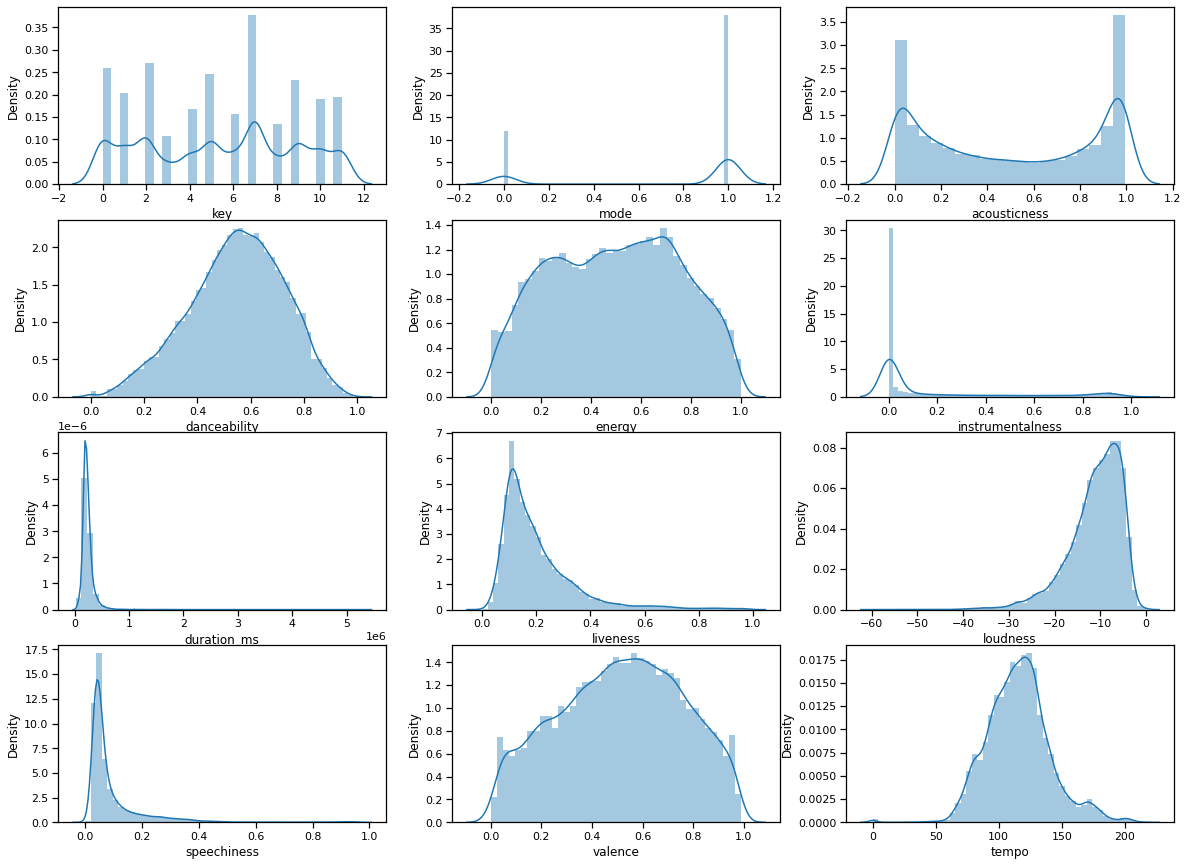

In [87]:
sns.set_context("notebook", font_scale=1)
plt.rcParams['figure.figsize'] = (20, 15)
plt.subplot(4, 3, 1)
sns.distplot(data['key'])
plt.subplot(4, 3, 2)
sns.distplot(data['mode'])
plt.subplot(4, 3, 3)
sns.distplot(data['acousticness'])
plt.subplot(4, 3, 4)
sns.distplot(data['danceability'])
plt.subplot(4, 3, 5)
sns.distplot(data['energy'])
plt.subplot(4, 3, 6)
sns.distplot(data['instrumentalness'])
plt.subplot(4, 3, 7)
sns.distplot(data['duration_ms'])
plt.subplot(4, 3, 8)
sns.distplot(data['liveness'])
plt.subplot(4, 3, 9)
sns.distplot(data['loudness'])
plt.subplot(4, 3, 10)
sns.distplot(data['speechiness'])
plt.subplot(4, 3, 11)
sns.distplot(data['valence'])
plt.subplot(4, 3, 12)
sns.distplot(data['tempo'])
plt.show()

In [88]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def fill_missing_value_by_imputer(df, col_name=None, method='mean'):
    imputer = SimpleImputer(missing_values=np.nan, strategy=method)
    # turn to np array to use reshape
    df_np = np.array(df[col_name])
    missing_new_value = imputer.fit_transform(df_np.reshape(-1, 1)).squeeze()
    df[col_name] = pd.Series(missing_new_value)
    return df

   
def standard_scaler(df, col_name=None):
    ss = StandardScaler()
    # reshape np array to fit_transform
    col_array = df[col_name].to_numpy().reshape(-1, 1)
    scaled_col = ss.fit_transform(col_array)

    # replace original data
    scaled_col = scaled_col.reshape(-1)
    df[col_name] = pd.Series(scaled_col)

    return df

In [89]:
missing_value_cols = ['acousticness', 'popularity', 'duration_ms', 'liveness', 'loudness', 'key']
for col in missing_value_cols:
    data = fill_missing_value_by_imputer(data, col, method='mean')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           24919 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  float64
 14  mode              28680 non-null  int64  
dtypes: float64(12), int64(1), object(2)
memory usage: 3.3+ MB


In [90]:
for col_name in data.columns[2:]:
    data = standard_scaler(data, col_name)

In [91]:
data.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,['show tunes'],NaN,0.258186,-0.449184,0.098176,-0.406013,-0.547439,0.706374,-6.486070e-01,1.039205,0.066922,-0.504151,-3.259661e-16,-1.250869e-01,0.56323
1,[],"""Cats"" 1983 Broadway Cast",1.032229,-0.593635,0.420123,-0.355776,-0.313665,0.901563,8.810027e-02,0.734007,-0.511957,-0.997712,-1.586877e-01,-1.250869e-01,0.56323
2,[],"""Fiddler On The Roof” Motion Picture Chorus",1.015275,-1.123156,0.782823,-0.827512,-0.503226,0.986183,3.482318e-16,0.218780,-1.538550,-0.645888,3.767012e-02,-1.628168e+00,0.56323
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",1.095838,-0.688023,0.207686,-0.987591,-0.339037,0.583475,-8.821598e-01,0.260623,-1.086940,-0.575629,3.742740e-02,2.670008e-16,0.56323
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.000000,-0.449634,0.273407,-0.036105,-0.554140,-0.060815,3.482318e-16,0.040439,0.279603,-0.124530,4.112290e-01,2.670008e-16,0.56323


In [92]:
data['danceability']

0       -0.449184
1       -0.593635
2       -1.123156
3       -0.688023
4       -0.449634
           ...   
28675   -1.079442
28676    0.178556
28677    0.137859
28678   -1.096442
28679   -0.563776
Name: danceability, Length: 28680, dtype: float64

## Preprocessing - Label

In [93]:
def merge_style_to_list(genres_series):
    all_style = list()
    for s in genres_series:
        if not s == '[]':
            s = s.replace("[", '').replace("]", '')
            s = s.replace('"', '').replace("'", '')
            all_style += s.split(', ')
    return all_style

In [94]:
all_style_list = merge_style_to_list(data['genres'])

In [95]:
counter = Counter(all_style_list).most_common()
style, count = zip(*counter)
print('Genres unique number :', len(style))

Genres unique number : 2972


In [96]:
# print 前幾個 label 的數量
genres_dict = dict()
style_list = list()
count_list = list()
for style, count in counter:
    style_list.append(style)
    count_list.append(count)

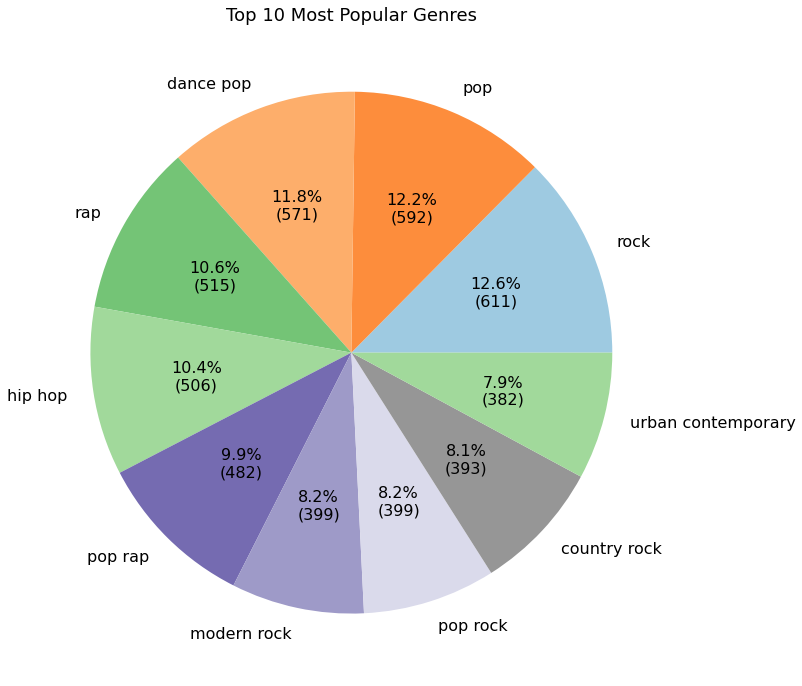

In [97]:
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

cmap = plt.get_cmap("tab20c") 
inner_colors = cmap(np.array([2, 5, 6, 9, 10, 12, 13, 15, 17, 10, 19, 21]))

fig, ax = plt.subplots(figsize=(14, 12), subplot_kw=dict(aspect="equal"))

plt.pie(
    count_list[:10],
    labels = style_list[:10], 
    autopct = lambda pct: func(pct, count_list[:10]), 
    colors = inner_colors, 
    textprops={'fontsize': 16}) 
plt.title('Top 10 Most Popular Genres', fontdict={'fontsize':18})
plt.show()

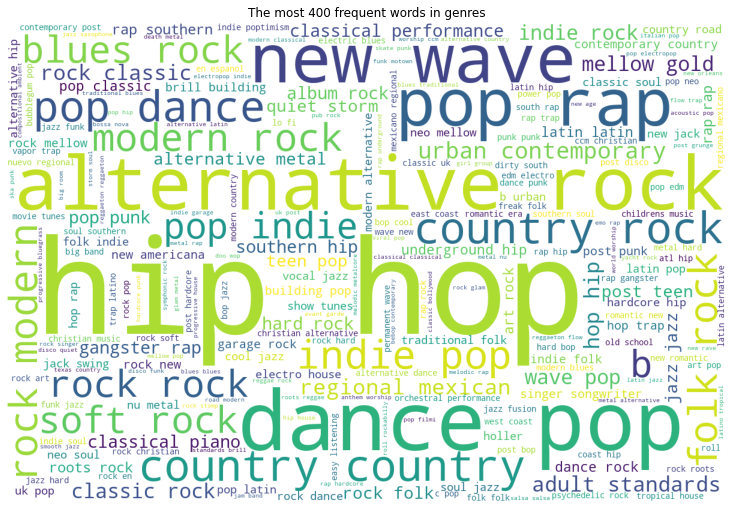

In [98]:
max_words = 400
wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='white', max_words = max_words, colormap="viridis",
                min_font_size = 10).generate(" ".join(all_style_list))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title(f"The most {max_words} frequent words in genres")
plt.show()

In [99]:
labels = data['genres']
X = data.drop(columns=['genres', 'artists'])
X

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,0.258186,-0.449184,0.098176,-0.406013,-0.547439,0.706374,-6.486070e-01,1.039205,0.066922,-0.504151,-3.259661e-16,-1.250869e-01,0.563230
1,1.032229,-0.593635,0.420123,-0.355776,-0.313665,0.901563,8.810027e-02,0.734007,-0.511957,-0.997712,-1.586877e-01,-1.250869e-01,0.563230
2,1.015275,-1.123156,0.782823,-0.827512,-0.503226,0.986183,3.482318e-16,0.218780,-1.538550,-0.645888,3.767012e-02,-1.628168e+00,0.563230
3,1.095838,-0.688023,0.207686,-0.987591,-0.339037,0.583475,-8.821598e-01,0.260623,-1.086940,-0.575629,3.742740e-02,2.670008e-16,0.563230
4,0.000000,-0.449634,0.273407,-0.036105,-0.554140,-0.060815,3.482318e-16,0.040439,0.279603,-0.124530,4.112290e-01,2.670008e-16,0.563230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,0.000000,-1.079442,-0.350805,-0.751286,-0.555582,0.000000,3.482318e-16,-0.592176,1.367981,-0.755770,4.422379e-02,1.377994e+00,0.563230
28676,0.118648,0.178556,0.477263,-0.641430,-0.585622,0.000000,-1.636113e-01,-0.601106,0.803458,-1.103537,6.406072e-01,1.077378e+00,-1.775474
28677,0.813212,0.137859,-0.561511,-1.369614,-0.585364,-0.483575,3.482318e-16,-0.354156,0.149637,0.935083,-5.062840e-01,-1.250869e-01,0.563230
28678,0.000000,-1.096442,0.671679,0.739608,-0.585642,0.000000,3.992111e-01,-0.486804,3.379387,-0.657577,4.422379e-02,1.678610e+00,0.563230


In [100]:
mask1 = labels.str.contains('rock')
mask2 =labels.str.contains('metal')
mask3 = labels.str.contains('punk')
mask4 = labels.str.contains('new wave')
labels[mask1|mask2|mask3|mask4] = 'rock'

mask1 = labels.str.contains('jazz')
mask2 = labels.str.contains('bossa nova')
mask3 = labels.str.contains('swing')
labels[mask1|mask2|mask3] = 'jazz'

mask1 = labels.str.contains('electro')
mask2 = labels.str.contains('edm')
mask3 = labels.str.contains('house')
labels[mask1|mask2|mask3] = 'electronica'

mask1 = labels.str.contains('r&b')
mask2 = labels.str.contains('blues')
mask3 = labels.str.contains('soul')
mask4 = labels.str.contains('motown')
mask5 = labels.str.contains('funk')
mask6 = labels.str.contains('disco')
labels[mask1|mask2|mask3|mask4|mask5|mask6] = 'r&b'

mask1 = labels.str.contains('hip hop')
mask2 = labels.str.contains('rap')
labels[mask1|mask2] = 'hip hop'

In [101]:
data['genres'] = labels

In [102]:
new_df = data[data["genres"].str.contains('\[')==False]
new_df['genres'].unique()

array(['rock', 'hip hop', 'r&b', 'jazz', 'electronica'], dtype=object)

In [103]:
#encode label
valus_unique_list = new_df['genres'].unique()
count = 0
record_dict = dict()
for value in valus_unique_list:
    mask = (new_df['genres'] == value)
    new_df['genres'][mask] = str(count)
    record_dict[value] =  str(count)
    count += 1

In [104]:
record_dict

{'rock': '0', 'hip hop': '1', 'r&b': '2', 'jazz': '3', 'electronica': '4'}

In [105]:
Y = new_df['genres']
X = new_df.drop(columns='genres')
X = X.drop(columns=['artists'])
Y = Y.astype('category')

## Model - SVM

In [106]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [107]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, Y, test_size=0.2, random_state=1)
svc = SVC(decision_function_shape='ovr')
svc.fit(X_train_svm, y_train_svm)

SVC()

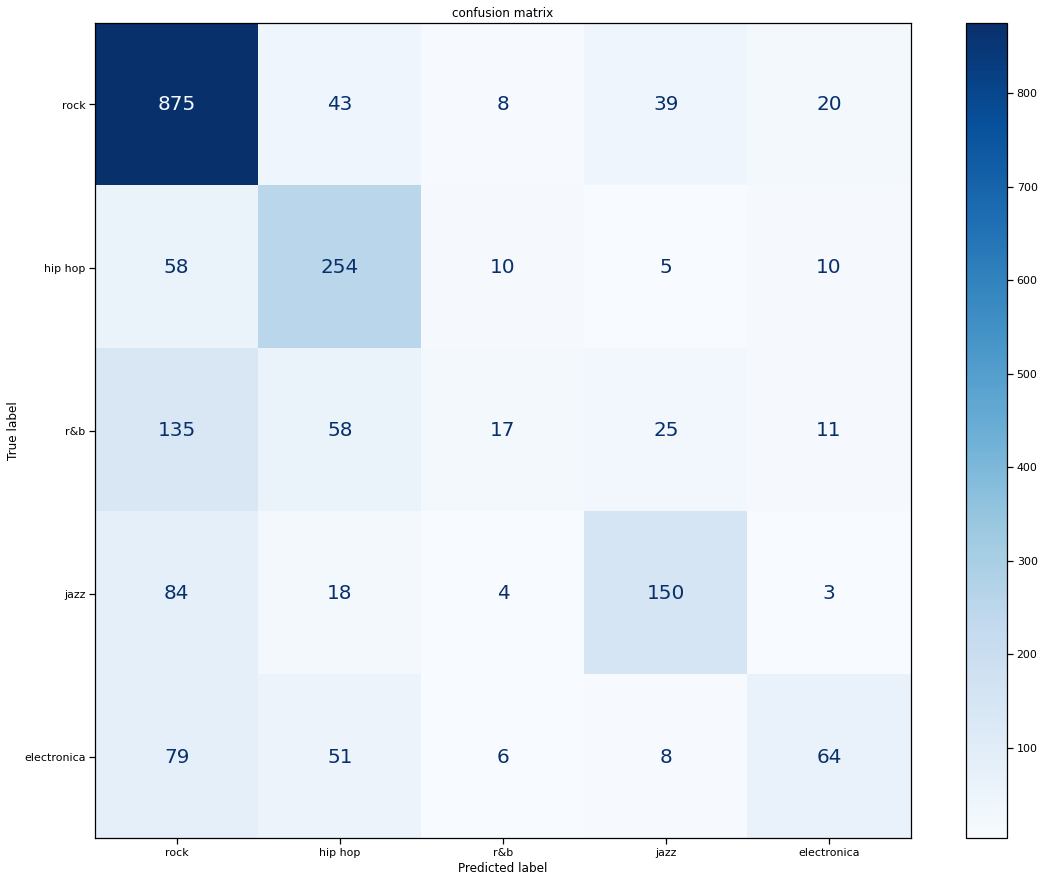

In [112]:
plt.rcParams.update({'font.size': 20})
confusion_matrix(y_true=y_test_svm, y_pred=svc.predict(X_test_svm))
plot_confusion_matrix(svc, X_test_svm, y_test_svm, cmap=plt.cm.Blues, display_labels=record_dict.keys())
plt.title('confusion matrix')
plt.show()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svc.predict(X_test),target_names=record_dict.keys()))

              precision    recall  f1-score   support

        rock       0.71      0.89      0.79       985
     hip hop       0.60      0.75      0.67       337
         r&b       0.38      0.07      0.12       246
        jazz       0.66      0.58      0.62       259
 electronica       0.59      0.31      0.41       208

    accuracy                           0.67      2035
   macro avg       0.59      0.52      0.52      2035
weighted avg       0.63      0.67      0.63      2035



## Model - NN

In [40]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras import backend as K
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Dropout

In [113]:
lb = LabelBinarizer()
Y = lb.fit_transform(new_df['genres'])
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train_nn = K.cast_to_floatx(X_train_nn)
Y_train_nn = K.cast_to_floatx(y_train_nn)
X_test_nn = K.cast_to_floatx(X_test_nn)
Y_test_nn = K.cast_to_floatx(y_test_nn)

In [114]:
Y_train_nn.shape

(8140, 5)

In [115]:
model = Sequential()
model.add(Dense(50, activation='tanh', input_shape=(13,)))
model.add(Dropout(0.5))
model.add(Dense(40, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(20, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))
model.summary()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_nn , Y_train_nn, epochs=200)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                700       
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 40)                2040      
_________________________________________________________________
dropout_5 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout_6 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [117]:
model.evaluate(X_test_nn, Y_test_nn)

64/64 [==============================] - 0s 4ms/step - loss: 0.9424 - accuracy: 0.6609


[0.9424453377723694, 0.6609336733818054]

In [119]:
predictions = model.predict_classes(X_test_nn)

In [118]:
y_test_original = lb.inverse_transform(y_test_nn)
y_test_original = y_test_original.astype('int')

In [120]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(predictions, y_test_original)
confusion_matrix

array([[840,  46, 121,  72,  63],
       [ 47, 255,  57,  18,  46],
       [ 12,  10,  15,   3,   5],
       [ 56,   9,  41, 162,  21],
       [ 30,  17,  12,   4,  73]])

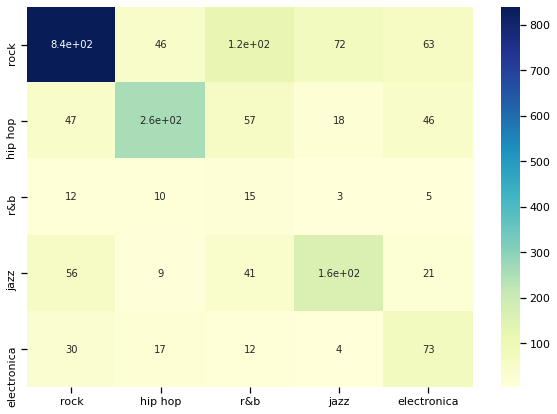

In [123]:
import seaborn as sn
plt.rcParams.update({'font.size': 10})
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in record_dict.keys()],
                  columns = [i for i in record_dict.keys()])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")
plt.show()

In [70]:
print(classification_report(y_test_original, predictions,target_names=record_dict.keys()))

              precision    recall  f1-score   support

        rock       0.74      0.85      0.79       985
     hip hop       0.61      0.79      0.68       337
         r&b       0.36      0.04      0.07       246
        jazz       0.57      0.64      0.61       259
 electronica       0.56      0.37      0.45       208

    accuracy                           0.67      2035
   macro avg       0.57      0.54      0.52      2035
weighted avg       0.63      0.67      0.63      2035



## Data Reduction

In [124]:
X

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
8,-0.926532,0.659014,-1.750718e-01,0.776463,-0.585475,-0.332186,2.687083e-01,-0.084640,0.687361,0.976290,0.008877,1.077378,0.563230
9,0.128497,1.378754,-8.809402e-01,0.139066,-0.508355,-0.178495,3.901411e-01,1.783041,-0.139982,-0.131017,1.536712,-1.327552,0.563230
10,-0.739419,1.906887,-8.495085e-01,0.500281,-0.585642,-1.009460,1.380377e+00,1.348277,0.433228,1.465846,1.512245,0.175529,0.563230
12,-0.997692,1.742554,2.535051e-16,0.727838,-0.585635,-0.112850,8.120652e-01,1.133961,-0.604731,0.461414,1.076426,-1.327552,0.563230
13,-1.016487,1.149504,-8.071118e-01,0.541680,-0.432576,-0.002753,3.482318e-16,0.554486,-0.032908,-0.922348,1.273691,-1.327552,0.563230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28628,1.053429,-0.507110,1.358988e+00,-1.500656,2.145583,-0.962228,-3.256880e+00,-0.294813,-0.930827,-1.434939,-0.368657,-1.327552,0.563230
28638,0.804817,-0.472165,1.518637e+00,-0.496264,0.690723,0.000000,-1.742953e-01,-0.505408,-0.719155,-1.012641,0.380645,0.476145,-1.775474
28643,-1.088044,0.297556,1.134025e+00,0.321766,1.572529,-0.961427,-7.497622e-01,-0.454210,-0.001113,0.944196,-0.024590,-1.628168,0.563230
28664,0.000000,0.059556,2.132975e+00,-0.433490,2.252151,-0.427784,-5.085582e-01,-0.505557,-0.946345,-0.519289,0.172676,1.077378,0.563230


In [146]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X)

In [147]:
X_pca.shape

(10175, 12)

In [148]:
X_train_pca_nn, X_test_pca_nn, y_train_pca_nn, y_test_pca_nn = train_test_split(X_pca, Y, test_size=0.2, random_state=1)
X_train_pca_nn = K.cast_to_floatx(X_train_pca_nn)
Y_train_pca_nn = K.cast_to_floatx(y_train_pca_nn)
X_test_pca_nn = K.cast_to_floatx(X_test_pca_nn)
Y_test_pca_nn = K.cast_to_floatx(y_test_pca_nn)

In [149]:
model = Sequential()
model.add(Dense(50, activation='tanh', input_shape=(12,)))
model.add(Dropout(0.5))
model.add(Dense(40, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(20, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))
model.summary()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_pca_nn , y_train_pca_nn, epochs=50)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 50)                650       
_________________________________________________________________
dropout_23 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 40)                2040      
_________________________________________________________________
dropout_24 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 20)                820       
_________________________________________________________________
dropout_25 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)               

In [150]:
print('PCA (n_components=12) \n')
model.evaluate(X_test_pca_nn, y_test_pca_nn)

PCA (n_components=12) 

64/64 [==============================] - 0s 1ms/step - loss: 0.9684 - accuracy: 0.6521


[0.9684076309204102, 0.652088463306427]

### SVM

In [167]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

In [168]:
Y = new_df['genres'].astype('category')

In [169]:
X_train_pca_svm, X_test_pca_svm, y_train_pca_svm, y_test_pca_svm = train_test_split(X_pca, Y, test_size=0.2, random_state=1)
svc = SVC(decision_function_shape='ovr')
svc.fit(X_train_pca_svm, y_train_pca_svm)

SVC()

In [170]:
print('PCA (n_components=5)')
svc.score(X_test_pca_svm, y_test_pca_svm)

PCA (n_components=5)


0.5985257985257986